In [1]:
#set dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats

In [2]:
# # load aviation data
# aviation_data = pd.read_csv("./dataset/airline_data.csv")
# aviation_data.head()

In [3]:
aviation_data = pd.read_csv("./dataset/airline_data.csv")
aviation_data.head()
flights = aviation_data.to_dict(orient='records')
filtered_flights = []
for flight in flights:
    flight_date = str(flight["month"])
    if flight_date.startswith("11") or flight_date.startswith("12"):
        filtered_flights.append(flight)
print(len(filtered_flights))
formatted_flights = []
random_flights = random.sample(filtered_flights, min(200, len(filtered_flights)))
print(f"Number of randomly selected flights: {len(random_flights)}")
for flight in random_flights:
    airline_name = flight["carrier_name"]
    arrival_airport = flight["airport"]
    airport_name = flight["airport_name"]
    month = flight["month"]
    year = flight["year"]
    airline_delay = flight["carrier_delay"]
    weather_delay = flight["weather_delay"]
    nas_delay = flight["nas_delay"]
    security_delay = flight["security_delay"]
    late_aircraft_delay = flight["late_aircraft_delay"]
    count_airline_delay = flight["carrier_ct"]
    count_weather_delay = flight["weather_ct"]
    count_nas_delay = flight["nas_ct"]
    count_security_delay = flight["security_ct"]
    count_late_aircraft_delay = flight["late_aircraft_ct"]
    # NAS is the National Aviation System
    formatted_flights.append({
        "Year": year,
        "Month": month,
        "Airline Name": airline_name,
        "Arrival Airport": arrival_airport,
        "airport_name": airport_name,
        "Delay due to Airline in Mins": airline_delay,
        "Delay due to Weather in Mins": weather_delay,
        "Delay due to NAS in Mins": nas_delay,
        "Delay due to Security in Mins": security_delay,
        "Delay due to Late Aircraft in Mins": late_aircraft_delay,
        "# of Airline Delays": count_airline_delay,
        "# of Weather Delays": count_weather_delay,
        "# of NAS Delays": count_nas_delay,
        "# of Security Delays": count_security_delay,
        "# of Late Aircraft Delays": count_late_aircraft_delay
    })

11445
Number of randomly selected flights: 200


In [4]:
# for flight in flights:
#     flight_date = str(flight["month"])
#     if flight_date.startswith("11") or flight_date.startswith("12"):
#         filtered_flights.append(flight)
# # print(len(filtered_flights))

In [5]:
print(aviation_data["flight_date"].unique())

['12/2023' '11/2023' '10/2023' '9/2023' '8/2023' '7/2023' '6/2023'
 '5/2023' '4/2023' '3/2023' '2/2023' '1/2023' '12/2022' '11/2022'
 '10/2022' '9/2022' '8/2022' '7/2022' '6/2022' '5/2022' '4/2022' '3/2022'
 '2/2022' '1/2022' '12/2021' '11/2021']


In [6]:
# flights = aviation_data.to_dict(orient='records')

# filtered_flights = []

# for flight in flights:
#     flight_date = flight["flight_date"]
#     if flight_date.startswith("11") or flight_date.startswith("12"):
#         filtered_flights.append(flight)
        
# print(len(filtered_flights))

In [7]:
# formatted_flights = []

# random_flights = random.sample(filtered_flights, min(200, len(filtered_flights)))

# print(f"Number of randomly selected flights: {len(random_flights)}")

In [8]:
for flight in random_flights[:5]:
        print(flight["flight_date"])

11/2023
12/2023
11/2023
11/2022
11/2021


In [9]:
flight_data_df = pd.DataFrame(formatted_flights)

print(flight_data_df)

     Year  Month                 Airline Name Arrival Airport  \
0    2023     11              JetBlue Airways             MSP   
1    2023     12            Endeavor Air Inc.             FLL   
2    2023     11              JetBlue Airways             RDU   
3    2022     11              Spirit Airlines             CRW   
4    2021     11                    Envoy Air             ORF   
..    ...    ...                          ...             ...   
195  2021     11  Air Wisconsin Airlines Corp             COU   
196  2023     12      Alaska Airlines Network             FAT   
197  2023     12            PSA Airlines Inc.             VPS   
198  2022     11        SkyWest Airlines Inc.             ACT   
199  2022     12            Endeavor Air Inc.             ALB   

                                          airport_name  \
0    Minneapolis, MN: Minneapolis-St Paul Internati...   
1    Fort Lauderdale, FL: Fort Lauderdale-Hollywood...   
2     Raleigh/Durham, NC: Raleigh-Durham Inte

In [10]:
flight_data_df.to_csv("./dataset/flights.csv", index=True, mode='w')

flight_data_df = pd.read_csv("./dataset/flights.csv", index_col=0)

flight_data_df.head()

,Year,Month,Airline Name,Arrival Airport,airport_name,Delay due to Airline in Mins,Delay due to Weather in Mins,Delay due to NAS in Mins,Delay due to Security in Mins,Delay due to Late Aircraft in Mins,# of Airline Delays,# of Weather Delays,# of NAS Delays,# of Security Delays,# of Late Aircraft Delays
0,2023,11,JetBlue Airways,MSP,"Minneapolis, MN: Minneapolis-St Paul Internati...",184.0,0.0,101.0,0.0,47.0,4.99,0.00,2.59,0.00,1.43
1,2023,12,Endeavor Air Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",144.0,48.0,116.0,0.0,69.0,1.39,0.52,3.90,0.00,1.20
2,2023,11,JetBlue Airways,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",4362.0,0.0,335.0,11.0,2468.0,52.85,0.00,7.40,0.26,27.49
3,2022,11,Spirit Airlines,CRW,"Charleston/Dunbar, WV: West Virginia Internati...",21.0,0.0,22.0,0.0,3.0,1.06,0.00,0.74,0.00,0.20
4,2021,11,Envoy Air,ORF,"Norfolk, VA: Norfolk International",0.0,0.0,22.0,0.0,0.0,0.00,0.00,1.00,0.00,0.00


In [11]:
#import json
#import requests

#aviation_stack_api = "c612023093ef04f3142c66defcf82a7a"
#base_url = "https://api.aviationstack.com/v1/flights"

#date_from = "2018-11-01"
#date_to = "2023-12-31"

#url = f"{base_url}?access_key={aviation_stack_api}&flight_date={date_from},{date_to}"

#response = requests.get(url)
#data = response.json()

#print(data)

In [12]:
#flights = data.get('data', [])

#filtered_flights = []

#for flight in flights:
    #flight_date = pd.to_datetime(flight["flight_date"]).date()
    #if (flight_date.year >= 2018 and flight_date.year <= 2023) and (flight_date.month in [11, 12]):
        #filtered_flights.append(flight)

#formatted_flights = []

#random_flights = random.sample(filtered_flights, min(200, len(filtered_flights)))

#for flight in random_flights:
    #flight_number = flight["flight"]["number"]
    #flight_date = flight["flight_date"]
    #airline_name = flight["airline"]["name"]
    #scheduled_departure = flight["departure"]["scheduled"]
    #estimated_departure = flight["departure"]["estimated"]
    #actual_departure = flight["departure"]["actual"]
    #dep_iata = flight["departure"]["iata"]
    #arr_iata = flight["arrival"]["iata"]
    #flight_status = flight["flight_status"]

    #formatted_flights.append({"Flight Number": flight_number,
                        #"Date": flight_date,
                        #"Airline": airline_name,
                        #"Scheduled Departure": scheduled_departure,
                        #"Estimated Departure": estimated_departure,
                        #"Actual Departure": actual_departure,
                        #"Departure Location": dep_iata,
                        #"Arrival Location": arr_iata,
                        #"Flight Status": flight_status})

### Create Visualizations for the Data

In [13]:
# Load the CSV file into a DataFrame
df = pd.read_csv('./dataset/flights.csv')
df['Delay due to NAS in Mins'] = (df['Delay due to NAS in Mins'] / 60).round(2)
#Creat df for output
out_df = pd.DataFrame(df)
out_df

,Unnamed: 0,Year,Month,Airline Name,Arrival Airport,airport_name,Delay due to Airline in Mins,Delay due to Weather in Mins,Delay due to NAS in Mins,Delay due to Security in Mins,Delay due to Late Aircraft in Mins,# of Airline Delays,# of Weather Delays,# of NAS Delays,# of Security Delays,# of Late Aircraft Delays
0,0,2023,11,JetBlue Airways,MSP,"Minneapolis, MN: Minneapolis-St Paul Internati...",184.0,0.0,1.68,0.0,47.0,4.99,0.00,2.59,0.00,1.43
1,1,2023,12,Endeavor Air Inc.,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",144.0,48.0,1.93,0.0,69.0,1.39,0.52,3.90,0.00,1.20
2,2,2023,11,JetBlue Airways,RDU,"Raleigh/Durham, NC: Raleigh-Durham International",4362.0,0.0,5.58,11.0,2468.0,52.85,0.00,7.40,0.26,27.49
3,3,2022,11,Spirit Airlines,CRW,"Charleston/Dunbar, WV: West Virginia Internati...",21.0,0.0,0.37,0.0,3.0,1.06,0.00,0.74,0.00,0.20
4,4,2021,11,Envoy Air,ORF,"Norfolk, VA: Norfolk International",0.0,0.0,0.37,0.0,0.0,0.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,2021,11,Air Wisconsin Airlines Corp,COU,"Columbia, MO: Columbia Regional",133.0,0.0,0.00,0.0,771.0,2.03,0.00,0.00,0.00,1.97
196,196,2023,12,Alaska Airlines Network,FAT,"Fresno, CA: Fresno Yosemite International",23.0,18.0,0.00,0.0,0.0,1.00,1.00,0.00,0.00,0.00
197,197,2023,12,PSA Airlines Inc.,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",32.0,29.0,0.57,0.0,0.0,1.60,1.00,1.40,0.00,0.00
198,198,2022,11,SkyWest Airlines Inc.,ACT,"Waco, TX: Waco Regional",687.0,21.0,0.00,0.0,420.0,12.00,1.00,0.00,0.00,5.00


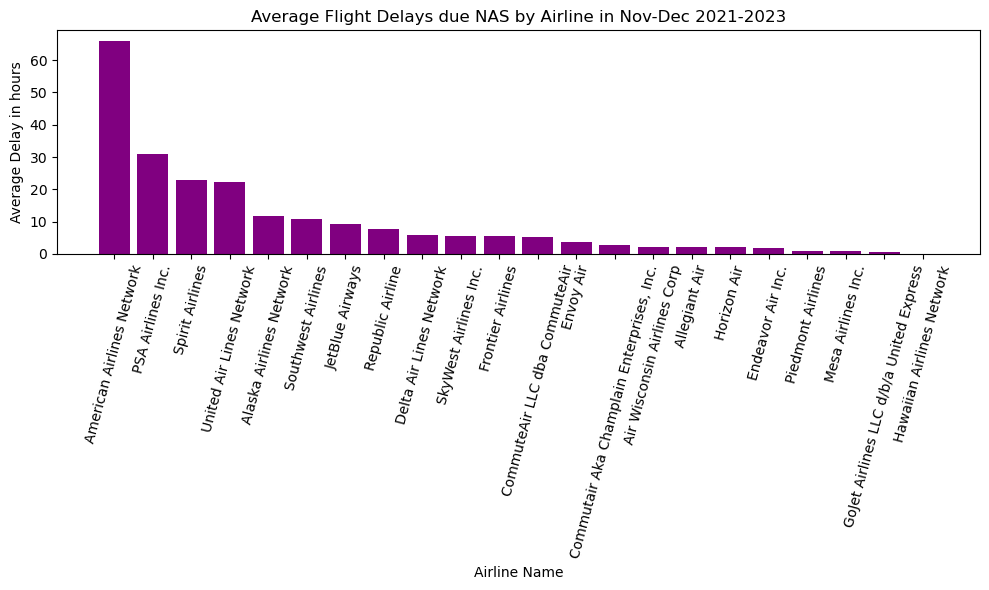

In [14]:
# Assuming you have a dataset named 'flights' with columns 'Airline Name' and 'Delay due to Weather in Mins'
# Replace with your actual dataset and column names

# Load your dataset
flights = out_df

# Group by airline and calculate average delay
#airline_delays = flights.groupby('Airline Name')['Delay due to Weather in Mins'].mean().reset_index()
airline_delays = flights.groupby('Airline Name')['Delay due to NAS in Mins'].mean().reset_index()

# Sort by average delay
airline_delays = airline_delays.sort_values(by='Delay due to NAS in Mins', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(airline_delays['Airline Name'], airline_delays['Delay due to NAS in Mins'],color="purple")
plt.xlabel('Airline Name')
plt.ylabel('Average Delay in hours')
plt.title('Average Flight Delays due NAS by Airline in Nov-Dec 2021-2023')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()
#airline_delays

   Year              Airline Name  # of NAS Delays
0  2023   Alaska Airlines Network        26.048333
1  2023   Delta Air Lines Network         6.923750
2  2023  United Air Lines Network         9.968571


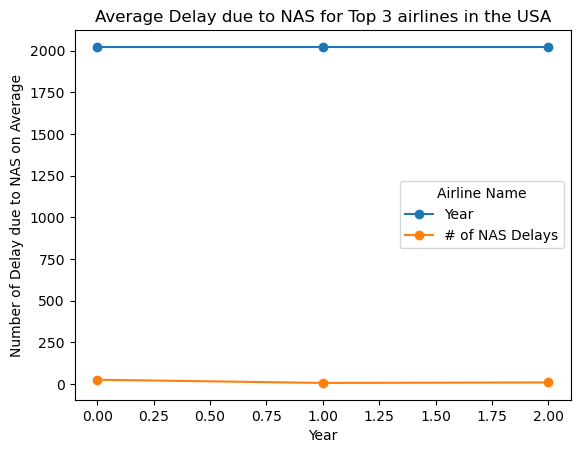

In [59]:
# Filter the DataFrame for the top 3 airlines
top_airlines = ['United Air Lines Network', 'Alaska Airlines Network', 'Delta Air Lines Network']
filtered_flights = flights[(flights['Airline Name'].isin(top_airlines) & (flights["Year"].isin([2023])))]
#print(filtered_flights)

# Now group by 'Airline Name' and calculate the mean of '# of NAS Delays'
avg_delay_by_top3airlines = filtered_flights.groupby(['Year', 'Airline Name'])['# of NAS Delays'].mean().reset_index()
print(avg_delay_by_top3airlines)

#plt.figure(figsize=(12, 6))
avg_delay_by_top3airlines.plot(kind='line', marker='o')
plt.title("Average Delay due to NAS for Top 3 airlines in the USA")
plt.xlabel("Year")
plt.ylabel("Number of Delay due to NAS on Average")
plt.legend(title="Airline Name")
plt.show()

In [16]:
import pandas as pd 
# Read the CSV file
df = pd.read_csv('./dataset/flights.csv')
# Assuming the column with the number of delays is named 'Delays'
delay_stats = df['Delay due to NAS in Mins'].agg(['min', 'max', 'count', 'mean'])
print(delay_stats)


min          0.00
max      34644.00
count      200.00
mean       659.37
Name: Delay due to NAS in Mins, dtype: float64


In [17]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean().round()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = flight_data_df['Delay due to NAS in Mins'].groupby(flight_data_df['Airline Name']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
Airline Name,,,,
"Commutair Aka Champlain Enterprises, Inc.",90.0,314.0,2.0,202.0
JetBlue Airways,0.0,311.0,2.0,156.0
CommuteAir LLC dba CommuteAir,96.0,123.0,3.0,113.0
Hawaiian Airlines Network,0.0,0.0,3.0,0.0
GoJet Airlines LLC d/b/a United Express,0.0,914.0,5.0,307.0
Republic Airline,86.0,20505.0,5.0,4261.0
Piedmont Airlines,0.0,2793.0,7.0,440.0
Mesa Airlines Inc.,0.0,1741.0,7.0,358.0
Spirit Airlines,35.0,3221.0,7.0,630.0


In [35]:
# Read the CSV file
df = pd.read_csv('./dataset/flights.csv')
# Assuming the column with the number of delays is named 'Delays'
global_stats = df['Delay due to NAS in Mins'].agg(['min', 'max', 'count', 'mean'])
print(delay_stats)

min          0.000
max      16367.000
count      200.000
mean       583.575
Name: Delay due to NAS in Mins, dtype: float64
